In [1]:
! which python

/Users/no_lineal/opt/anaconda3/envs/grid38/bin/python


In [2]:
import numpy as np

import os

# viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
""" 

    where am i?

"""

PATH = os.getcwd()
data_path = PATH.replace( '01_square_156', '' ) + 'data/01_square/01_square_1000000_156_129/'

print( f'PATH: { PATH }' )
print( f'data_path: { data_path }' )

PATH: /Users/no_lineal/Documents/draft_code/grid_metrics/01_square_156
data_path: /Users/no_lineal/Documents/draft_code/grid_metrics/data/01_square/01_square_1000000_156_129/


In [4]:
""" 

    load scores

"""

sac_random_max_score_60 = []

for f in sorted([ x for x in os.listdir( data_path + 'grid_scores/sac_random/max/' ) if 'score_60' in x ]):
    sac_random_max_score_60.append( np.load( data_path + 'grid_scores/sac_random/max/' + f ) )

sac_random_max_score_90 = []

for f in sorted([ x for x in os.listdir( data_path + 'grid_scores/sac_random/max/' ) if 'score_90' in x ]):
    sac_random_max_score_90.append( np.load( data_path + 'grid_scores/sac_random/max/' + f ) )

sac_random_max_score_60 = np.array( sac_random_max_score_60 )
sac_random_max_score_90 = np.array( sac_random_max_score_90 )

print( f'sac_random_max_score_60: { sac_random_max_score_60.shape }' )
print( f'sac_random_max_score_90: { sac_random_max_score_90.shape }' )

sac_random_max_score_60: (100, 512)
sac_random_max_score_90: (100, 512)


In [5]:
"""  

    flatten

"""

sac_random_max_score_60 = sac_random_max_score_60.flatten()
sac_random_max_score_90 = sac_random_max_score_90.flatten()

print( f'sac_random_max_score_60: { sac_random_max_score_60.shape }' )
print( f'sac_random_max_score_90: { sac_random_max_score_90.shape }' )

sac_random_max_score_60: (51200,)
sac_random_max_score_90: (51200,)


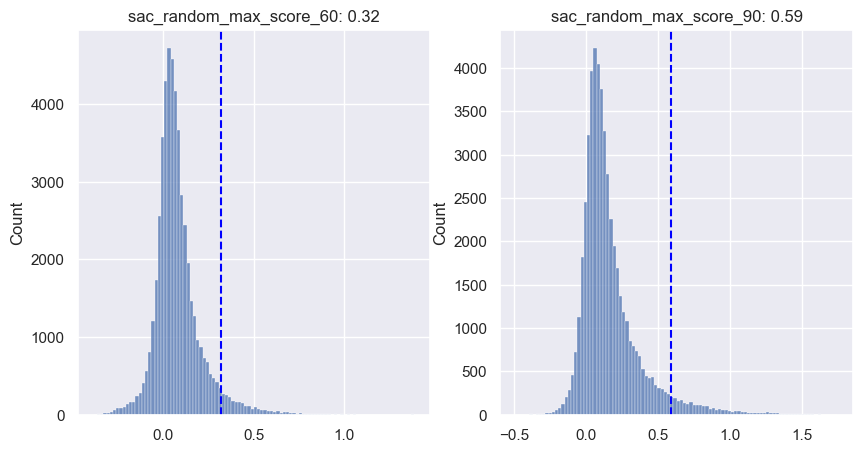

In [6]:
""" 

    viz

"""

fig, ax = plt.subplots( 1, 2, figsize=( 10, 5 ) )

th = np.nanpercentile( sac_random_max_score_60, 95 )
sns.histplot( sac_random_max_score_60, ax=ax[0], bins=100 )
ax[0].axvline( x=th, color='blue', linestyle='--' )
ax[0].set_title( f'sac_random_max_score_60: { round(th, 2) }' )

th = np.nanpercentile( sac_random_max_score_90, 95 )
sns.histplot( sac_random_max_score_90, ax=ax[1], bins=100 )
ax[1].axvline( x=th, color='blue', linestyle='--' )
ax[1].set_title( f'sac_random_max_score_90: { round(th, 2) }' )

plt.show()